# Solar Azimuth and Zenith Tracker

## Version 3 (Less slow and more acurate edition)

Next steps: Use SIMD technology for speed up. Implement Meteorological data   

Latest improvent removal of random tries towards a fixed space solution.
This is the first app of a series, where i create simple apps to improve my programming skills.

An application which tracks the sun according to the latitude and longtitude or the address (defined by google) of the location. Based on stackoverflow answers.


Test for Stirling Scotland, Sydney Australia, Quito Ecuador

## Asking user for location

In [34]:
#import astropy
import astropy.coordinates as coord
import astropy.units as u
from astropy.time import Time

#import random and math libraries
import math as m
#import random as r #Not needed anymore

#import Angles convertor + numpy
from astropy.coordinates import Angle
import numpy as np

#import utc time now
from datetime import datetime,timezone,timedelta 
now_utc = datetime.now(timezone.utc)

#import pandas
import pandas as pd

#ask user: coordinates or address
while True:
    try:
        selector = int(input('Enter: 1 for address, 2 for coordinates, 0 for defaults: '))
        break
    except:
        print('Not Valid, Enter: 1 for address, 2 for coordinates, 3 for defaults: ')
#print(selector)

#Option 0: defaults
if selector == 0: 
    longt,latit,hei = 0,0,0
    print('Longtitude:',longt , 'Latitude:',latit,'Height:',hei)
    
#Option 1: ask user an address
#Work in progress for wrong addresses
if selector == 1:
    name = input('Enter an address: ')
    if name == '':
        name = 'Stirling UK'
    print('The address is:', name)

#Option 2: ask user an address
if selector == 2 :
    try:
        longt = int(input('Enter longtitude or 0 for default: '))
        if longt == 0 : longt = 01
            
        latit = int(input('Enter latitude or 0 for default: '))
        if latit == 0 : latit = 0
        hei = int(input('Enter height or 0 for default: '))
        if hei == 0 : hei = 0
        print('Longtitude:',longt , 'Latitude:',latit,'Height:',hei)
    except:
        longt,latit,hei = 0,0,0
        print('Longtitude:',longt , 'Latitude:',latit,'Height:',hei)

Enter: 1 for address, 2 for coordinates, 0 for defaults: Quito Ecuador
Not Valid, Enter: 1 for address, 2 for coordinates, 3 for defaults: 
Enter: 1 for address, 2 for coordinates, 0 for defaults: 1
Enter an address: Quito Ecuador
The address is: Quito Ecuador


In [35]:
sun_time = Time(now_utc) #UTC time
if selector == 1:
    #print('Selector: ',selector)
    loc = coord.EarthLocation.of_address(name) # anything the google geocoding API resolves
if (selector == 2) or (selector == 0):
    #print('Selector: ',selector)
    loc = coord.EarthLocation(lon=longt,lat=latit,height=hei)

print('Geocentric coordinates <<Earth diameter = 6371km>> x(greenwith),y(),z(North Pole)',loc)

Geocentric coordinates <<Earth diameter = 6371km>> x(greenwith),y(),z(North Pole) (1270241.92358368, -6250321.62380727, -24344.42721293) m


## Finding the sun, for every 30 min, for a year. for default settings

In [36]:
sun_test_Time = Time(now_utc)
print(sun_test_Time)
altaz = coord.AltAz(obstime=sun_time, location=loc)
#help(altaz)
zen_az = coord.get_sun(sun_time).transform_to(altaz).az
zen_alt = coord.get_sun(sun_time).transform_to(altaz).alt


print('Sun Elevation  Degrees now (above 0 day):',zen_alt)
print('Sun Azimuth    Degrees now              :',zen_az)

# year = 365 days * 24 hours * 60 minutes = (minute definition)
# year = 365 days * 24 hours (hours definition)
# initiallizing lists and the timescale of study
print('Warning Long Computations')
while True:
    try:
        time_range_mine = int(input('Select number of datapoints (integer) for solar reading, choose 0 for default 17520 point : '))
        if time_range_mine == 0:
            time_range_mine = 17520
        break
    except:
        print('Enter an integer or 0')
        
while True:
    try:
        delta_min = int(input('Select minutes (integer) between each solar reading, choose 0 for default 30 minutes : '))
        if delta_min == 0:
            delta_min = 30
        break
    except:
        print('Enter an integer or 0')
        
# TAKES A LOT OF TIME
sun_az = []
sun_alt = []
time_points = []
#minutes
for timepoint in range(time_range_mine):
    #delta of hours
    #
    past_date_before = Time(now_utc) - timedelta(minutes = (delta_min * timepoint))
    #print(past_date_before)
    altaz = coord.AltAz(obstime=past_date_before, location=loc)
    sun_az.append(coord.get_sun(past_date_before).transform_to(altaz).az)
    sun_alt.append(coord.get_sun(past_date_before).transform_to(altaz).alt)
    time_points.append(past_date_before)
    #print('Sun Elevation Degrees (above 0 day):',zen_alt)
    #print('Sun  Azimuth  Degrees              :',zen_ang)

#converting lists to pandas     
sun_tuple = list(zip(sun_az,sun_alt,time_points))
sun_df = pd.DataFrame(sun_tuple, columns=['Azimuth','Elevation','Time'])

2020-12-28 14:27:37.647495
Sun Elevation  Degrees now (above 0 day): 43d08m09.3555s
Sun Azimuth    Degrees now              : 122d28m53.4566s
Warning Long Computations
Select number of datapoints (integer) for solar reading, choose 0 for default 17520 point : 0
Select minutes (integer) between each solar reading, choose 0 for default 30 minutes : 0


## Before and after angle transformation

           Azimuth       Elevation                        Time
0  122d28m53.4566s  43d08m09.3555s  2020-12-28 14:27:37.647495
1  119d17m12.8462s  36d41m45.7936s  2020-12-28 13:57:37.647495
2  116d58m59.7452s  30d04m50.1843s  2020-12-28 13:27:37.647495
3  115d20m49.0331s  23d20m54.7084s  2020-12-28 12:57:37.647495
4  114d14m04.1156s  16d32m23.0144s  2020-12-28 12:27:37.647495
   Azimuth Elevation                        Time
0  122.482   43.1359  2020-12-28 14:27:37.647495
1  119.287   36.6961  2020-12-28 13:57:37.647495
2  116.983   30.0806  2020-12-28 13:27:37.647495
3  115.347   23.3485  2020-12-28 12:57:37.647495
4  114.234   16.5397  2020-12-28 12:27:37.647495


<AxesSubplot:>

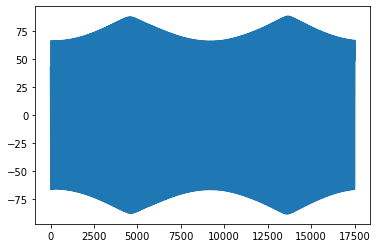

In [37]:
print(sun_df.head())
sun_df2 = sun_df.copy()

#print(type(sun_df2['Azimuth'][0]))
#var_test = Angle(sun_df2['Azimuth'][0]).degree
#print(var_test)
for i in range(len(sun_df2.index)):
    sun_df2['Azimuth'][i] = Angle(sun_df2['Azimuth'][i]).degree
    sun_df2['Elevation'][i] = Angle(sun_df2['Elevation'][i]).degree
#print(type(sun_df2['Azimuth'][0]))
#print(type(sun_df2['Time'][0]))
print(sun_df2.head())
#create graph
%matplotlib inline
sun_df2['Elevation'].plot()

<AxesSubplot:>

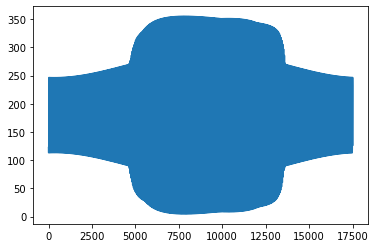

In [38]:
sun_df2['Azimuth'].plot()

Timepoints with light : 8778 Timepoints of whole Year : 17520


<AxesSubplot:>

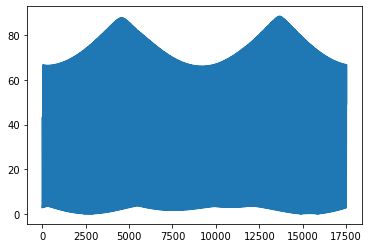

In [39]:
sun_df2 = sun_df2[sun_df2['Elevation'] >= 0]
timePointsOfSun = len(sun_df2.index)
print("Timepoints with light :",timePointsOfSun, "Timepoints of whole Year :",len(sun_df.index))

#create graph without negatives
%matplotlib inline
sun_df2['Elevation'].plot()

In [40]:
deg_z_solar_max = 90  # Elevation max
deg_z_solar_min = 0  # Elevation min
deg_x_solar_max = 360 # Azimuth max
deg_x_solar_min = 0 # Azimuth min
# size of integer space is 90 * 360 = 32400
number_of_tries = 32400
tally_saved = 0
index_mine = sun_df2.index
#print(len(index_mine))

elev_column = sun_df2['Elevation']
#print(len(elev_column))
azim_column = sun_df2['Azimuth']
#print(len(azim_column))

## The test against multiple angles of the solar panel to find the optimal angle

In [41]:
print('Takes a lot of time')


    
for i in range(number_of_tries):
    #old version
    #deg_gen_z_solar = r.randint(deg_z_solar_min,deg_z_solar_max)
    #deg_gen_x_solar = r.randint(deg_x_solar_min,deg_x_solar_max)
    
    #new full space of integers + minor performance boost
    deg_gen_z_solar = i // 360
    deg_gen_x_solar = i % 360
    
    #solar panel angles
    deg_z_solar = deg_gen_z_solar #or Elevation
    rad_z_solar = m.radians(deg_z_solar) #to radians
    deg_x_solar = deg_gen_x_solar #or Azimuth
    rad_x_solar = m.radians(deg_x_solar) #to radians

    z_vector_solar = m.sin(rad_z_solar)
    x_vector_solar = m.cos(rad_z_solar)*m.cos(rad_x_solar)
    y_vector_solar = m.cos(rad_z_solar)*m.sin(rad_x_solar) 
    
    tally=0
    
    for ii in index_mine:
        deg_z = elev_column[ii] #or Elevation
        rad_z = m.radians(deg_z) #to radians
        deg_x = azim_column[ii] #or Azimuth
        rad_x = m.radians(deg_x) #to radians
        z_vector_base = m.sin(rad_z)
        x_vector_base = m.cos(rad_z)*m.cos(rad_x)
        y_vector_base = m.cos(rad_z)*m.sin(rad_x)
        dot_product = x_vector_base*x_vector_solar + y_vector_base*y_vector_solar + z_vector_base*z_vector_solar
        tally += dot_product
    if tally > tally_saved:
        tally_saved = tally
        opt_elev_angle = deg_gen_z_solar
        opt_azim_angle = deg_gen_x_solar
print('Solar_panel_Elevation =',opt_elev_angle,'Solar_panel_Azimuth =',opt_azim_angle)

Takes a lot of time
Solar_panel_Elevation = 89 Solar_panel_Azimuth = 5


Version 3 
Sydney Elevation 59 Azimuth 0 (looking north)
Stirling Elevation 43 Azimuth 180 (looking south) (elevation closer to zero as compared to Sydney its closer to the pole)   
Quito Elevation 89 Azimuth 5 (solar panel horizontal to the ground)